In [67]:
%pip list

Package                        Version
------------------------------ -------------
altair                         5.5.0
annotated-types                0.7.0
anyio                          4.10.0
appdirs                        1.4.4
argcomplete                    3.6.2
asgiref                        3.9.1
asttokens                      3.0.0
attr                           0.3.1
attrs                          25.3.0
azure-core                     1.35.0
azure-storage-blob             12.26.0
beautifulsoup4                 4.13.5
black                          25.1.0
bleach                         5.0.1
blinker                        1.9.0
boto                           2.49.0
boto3                          1.40.11
botocore                       1.40.11
bs4                            0.0.2
cachetools                     5.5.2
certifi                        2025.8.3
cffi                           1.17.1
charset-normalizer             3.4.3
click                          8.2.1
colorama    

In [68]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [1]:
# import python libraries
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [49]:
df['Zone'].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

In [6]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# drop null values
df.dropna(inplace=True)

In [9]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int32')

In [12]:
df.columns.to_list()

['User_ID',
 'Cust_name',
 'Product_ID',
 'Gender',
 'Age Group',
 'Age',
 'Marital_Status',
 'State',
 'Zone',
 'Occupation',
 'Product_Category',
 'Orders',
 'Amount']

In [14]:
#rename column
df.rename(columns= {'Marital_Status':'Married'}, inplace=True) #True = 0 and False = 1

In [20]:
df['Married'].dtypes

dtype('int64')

In [21]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Married,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [22]:
df.columns.to_list()

['User_ID',
 'Cust_name',
 'Product_ID',
 'Gender',
 'Age Group',
 'Age',
 'Married',
 'State',
 'Zone',
 'Occupation',
 'Product_Category',
 'Orders',
 'Amount']

In [23]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# (EDA) Exploratory Data Analysis

### Analysis based on Gender

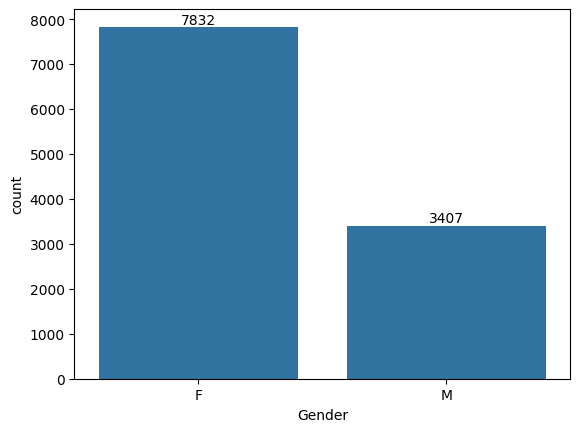

In [30]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

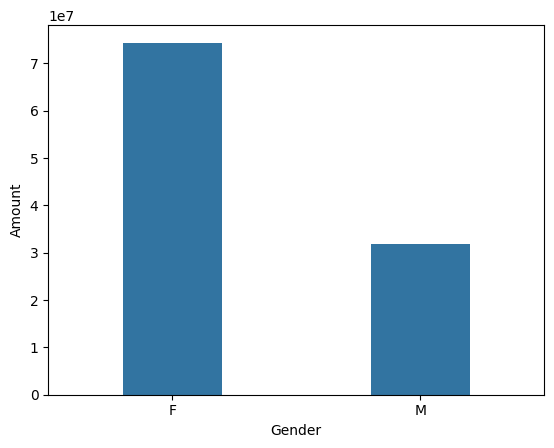

In [36]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, width= 0.4)

In [128]:
df.columns.to_list()

['User_ID',
 'Cust_name',
 'Product_ID',
 'Gender',
 'Age Group',
 'Age',
 'Married',
 'State',
 'Zone',
 'Occupation',
 'Product_Category',
 'Orders',
 'Amount']

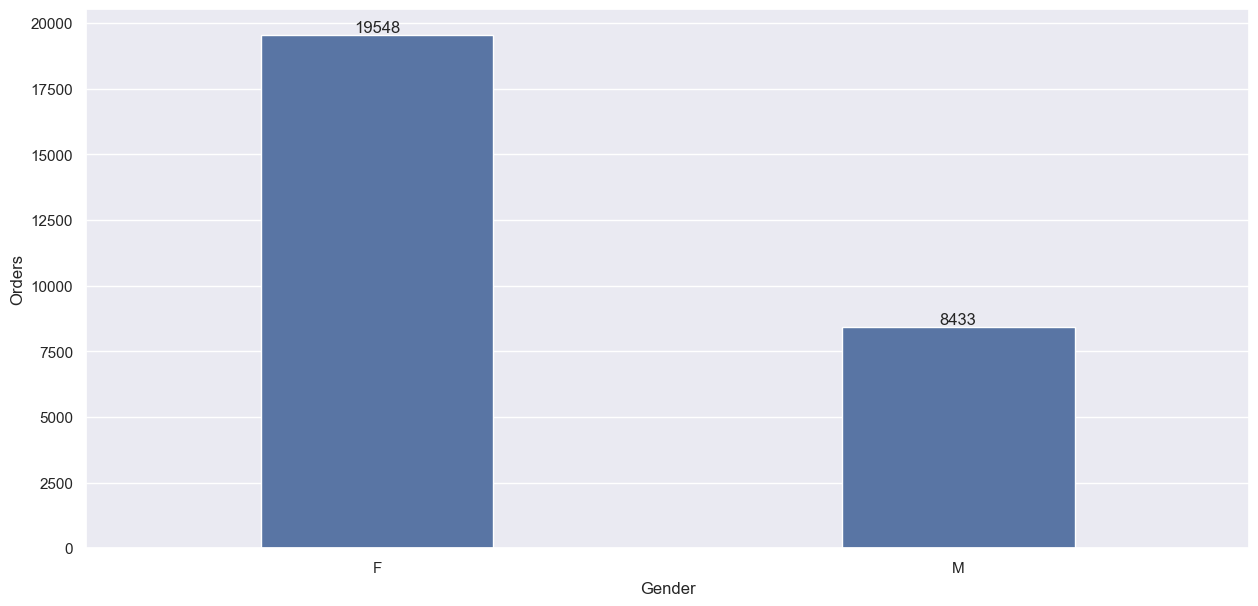

In [154]:
# plotting a bar chart for gender vs total orders

orders_gen = df.groupby(['Gender'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
ox = sns.barplot(x = 'Gender',y= 'Orders' ,data = orders_gen, width= 0.4)

for bars in ox.containers:
    ox.bar_label(bars)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Analysis based on Age

In [121]:
# Creating sorted age dataframe for better visualization
age_df = df.sort_values(by='Age')

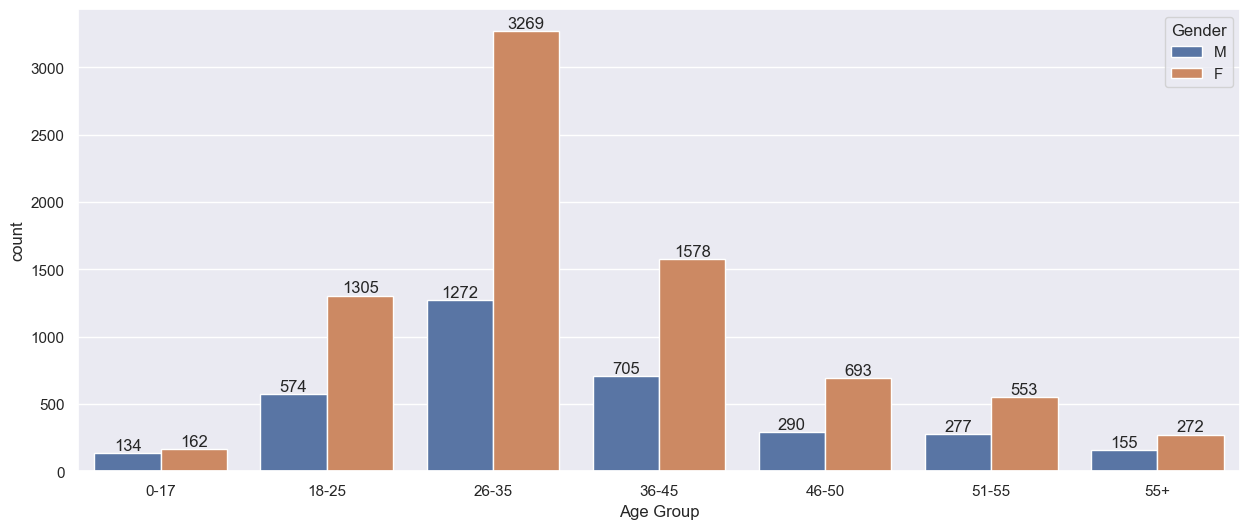

In [ ]:
ax = sns.countplot(data = age_df, x = 'Age Group', hue = 'Gender')

sns.set_theme(style="whitegrid")
for bars in ax.containers:
    ax.bar_label(bars)

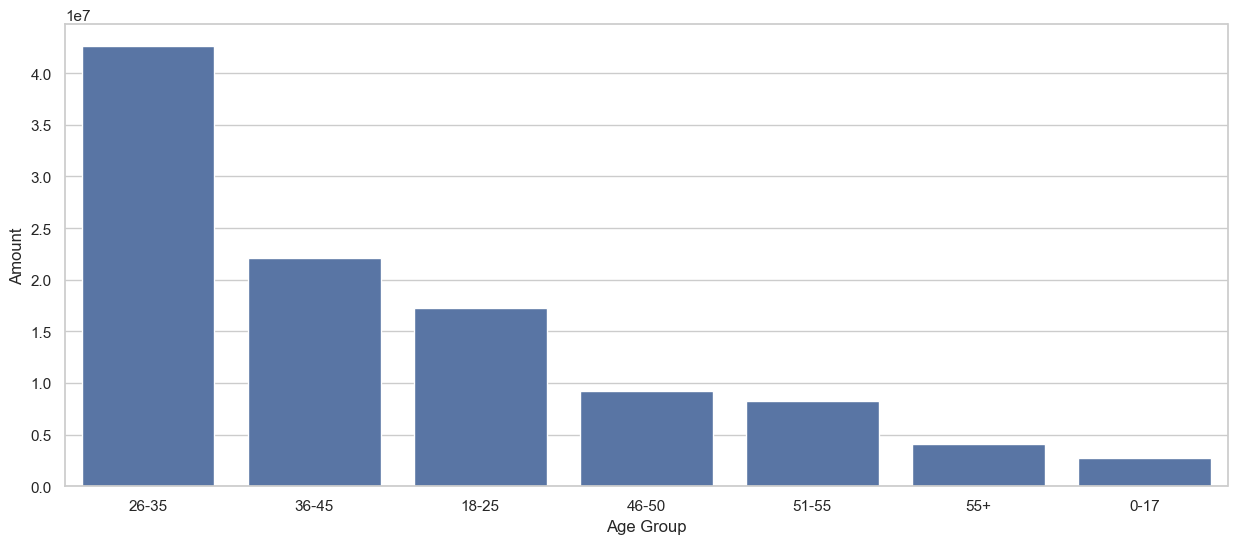

In [142]:
# Total Amount vs Age Group
sales_age = age_df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax = sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

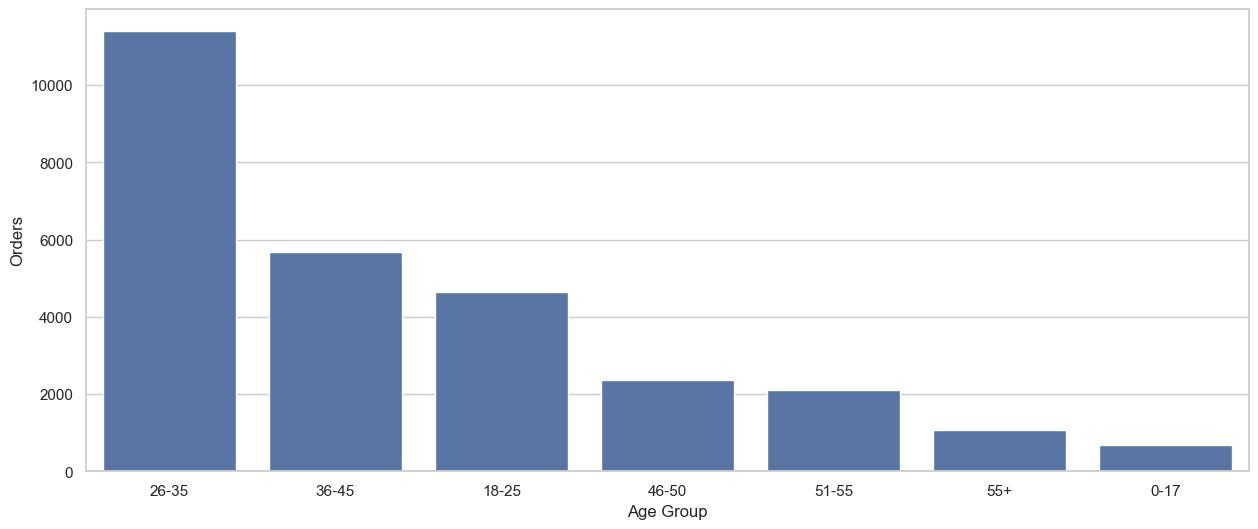

In [146]:
# Total Orders vs Age Group
sales_age = age_df.groupby(['Age Group'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)

ax = sns.barplot(x = 'Age Group',y= 'Orders' ,data = sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### Analysis based on State

In [156]:
state_df = df.sort_values(by='State')

<Axes: xlabel='State', ylabel='Orders'>

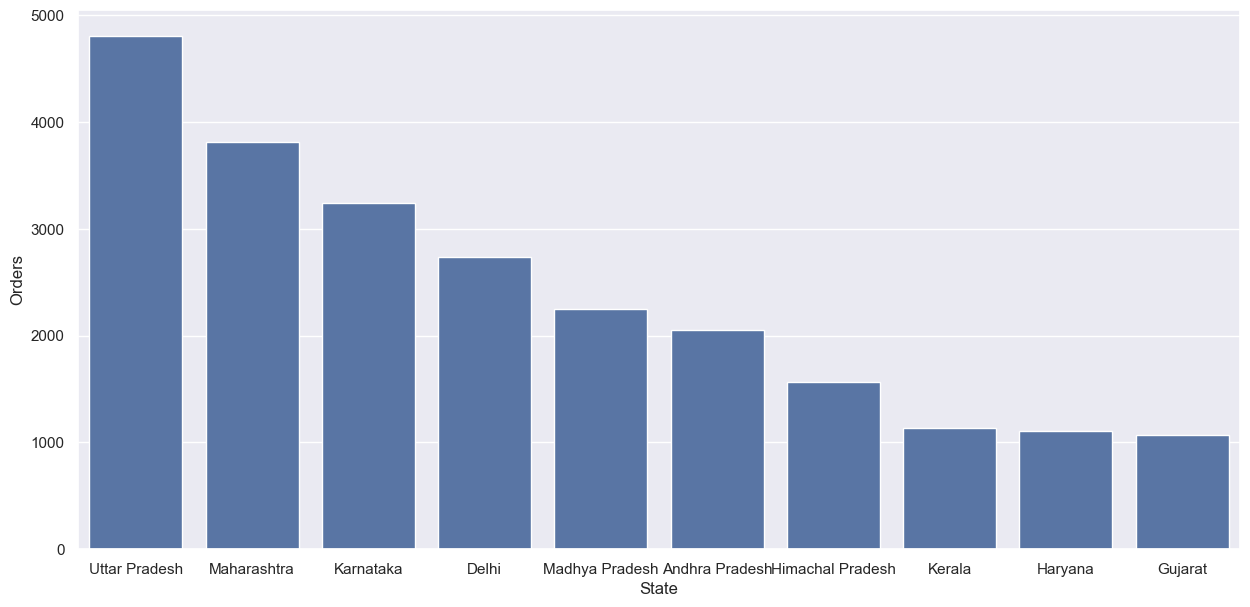

In [158]:
# total number of orders from top 10 states

sales_state = state_df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(15,7)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

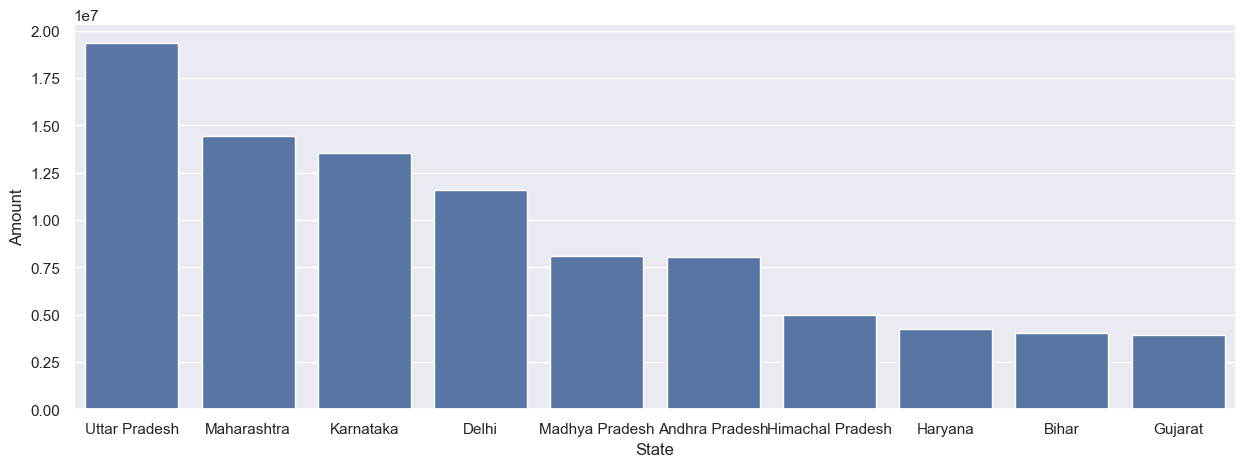

In [199]:
# total amount/sales from top 10 states

sales_state = state_df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Analysis based on Marital Status

In [205]:
m_df = df.sort_values(by='Married')

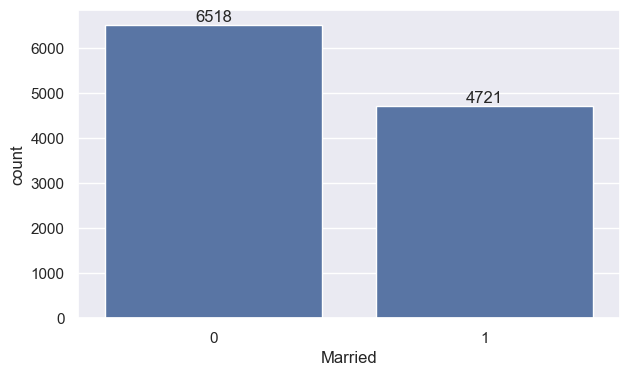

In [206]:
ax = sns.countplot(data = m_df, x = 'Married')

sns.set_theme(rc={'figure.figsize':(7,4)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Married', ylabel='Amount'>

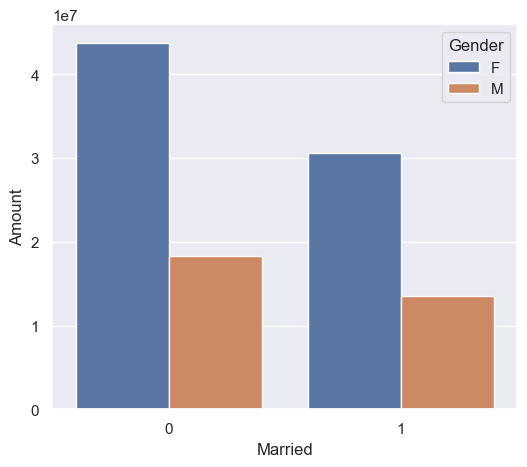

In [213]:
sales_state = m_df.groupby(['Married', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set_theme(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Married',y= 'Amount', hue='Gender')

<Axes: xlabel='Married', ylabel='Orders'>

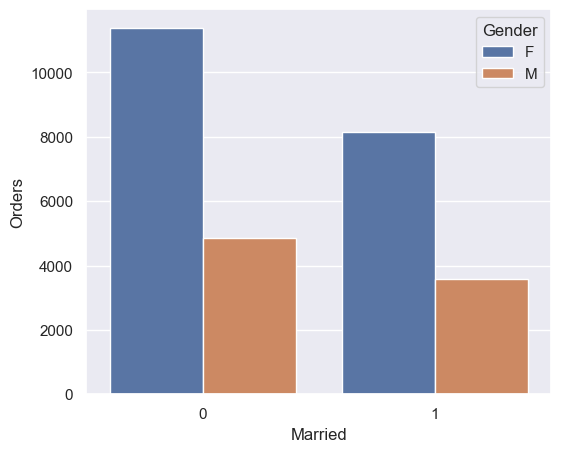

In [215]:
sales_state = m_df.groupby(['Married', 'Gender'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)

sns.set_theme(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Married',y= 'Orders', hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Analysis based on Occupation

In [217]:
o_df = df.sort_values(by='Occupation')

In [231]:
o_df['Occupation'].unique()

array(['Agriculture', 'Automobile', 'Aviation', 'Banking', 'Chemical',
       'Construction', 'Food Processing', 'Govt', 'Healthcare',
       'Hospitality', 'IT Sector', 'Lawyer', 'Media', 'Retail', 'Textile'],
      dtype=object)

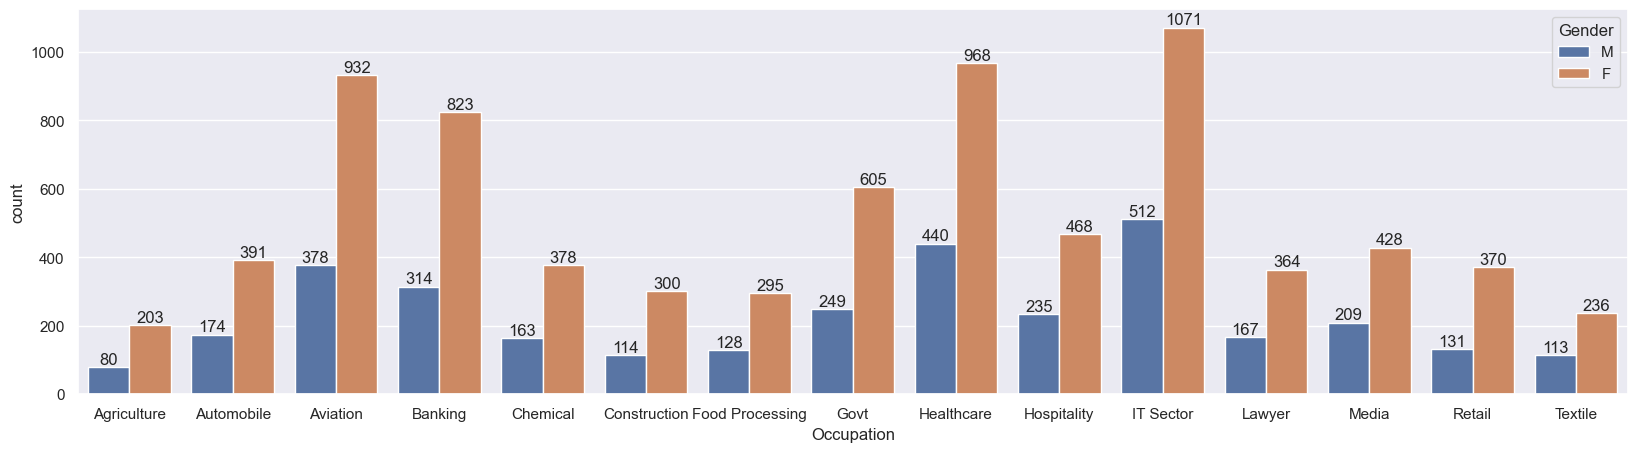

In [244]:
sns.set_theme(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = o_df, x = 'Occupation',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

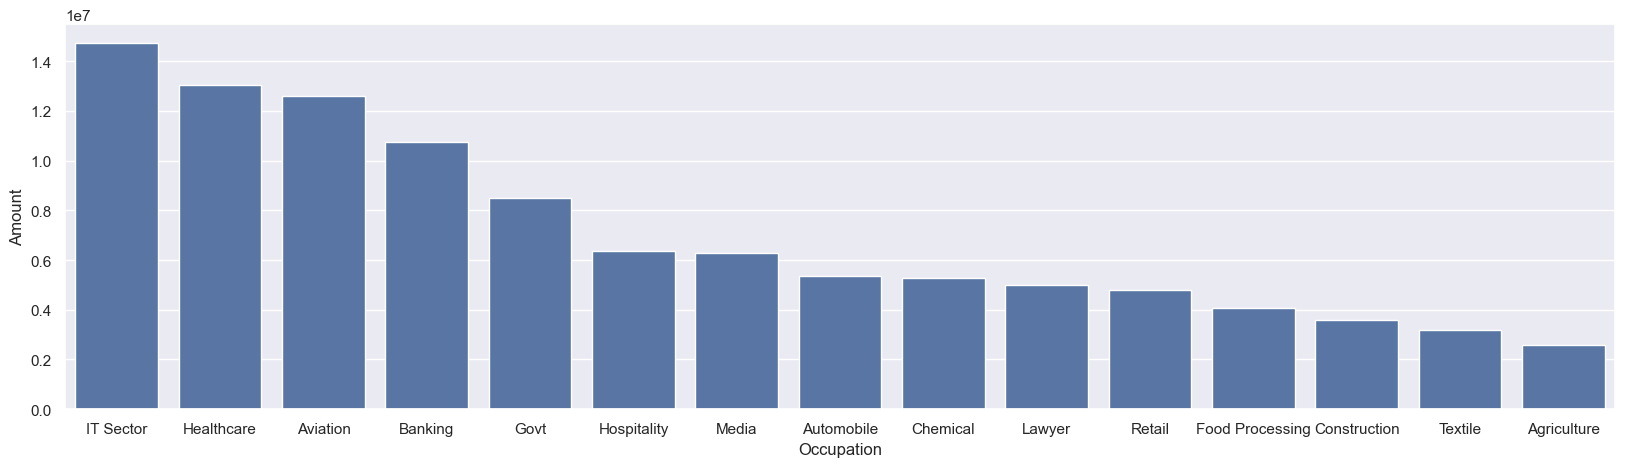

In [246]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set_theme(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Analysis based on Product Category

In [258]:
pc_df = df.sort_values(by='Product_Category')

In [260]:
pc_df.Product_Category.unique()

array(['Auto', 'Beauty', 'Books', 'Clothing & Apparel', 'Decor',
       'Electronics & Gadgets', 'Food', 'Footwear & Shoes', 'Furniture',
       'Games & Toys', 'Hand & Power Tools', 'Household items', 'Office',
       'Pet Care', 'Sports Products', 'Stationery', 'Tupperware',
       'Veterinary'], dtype=object)

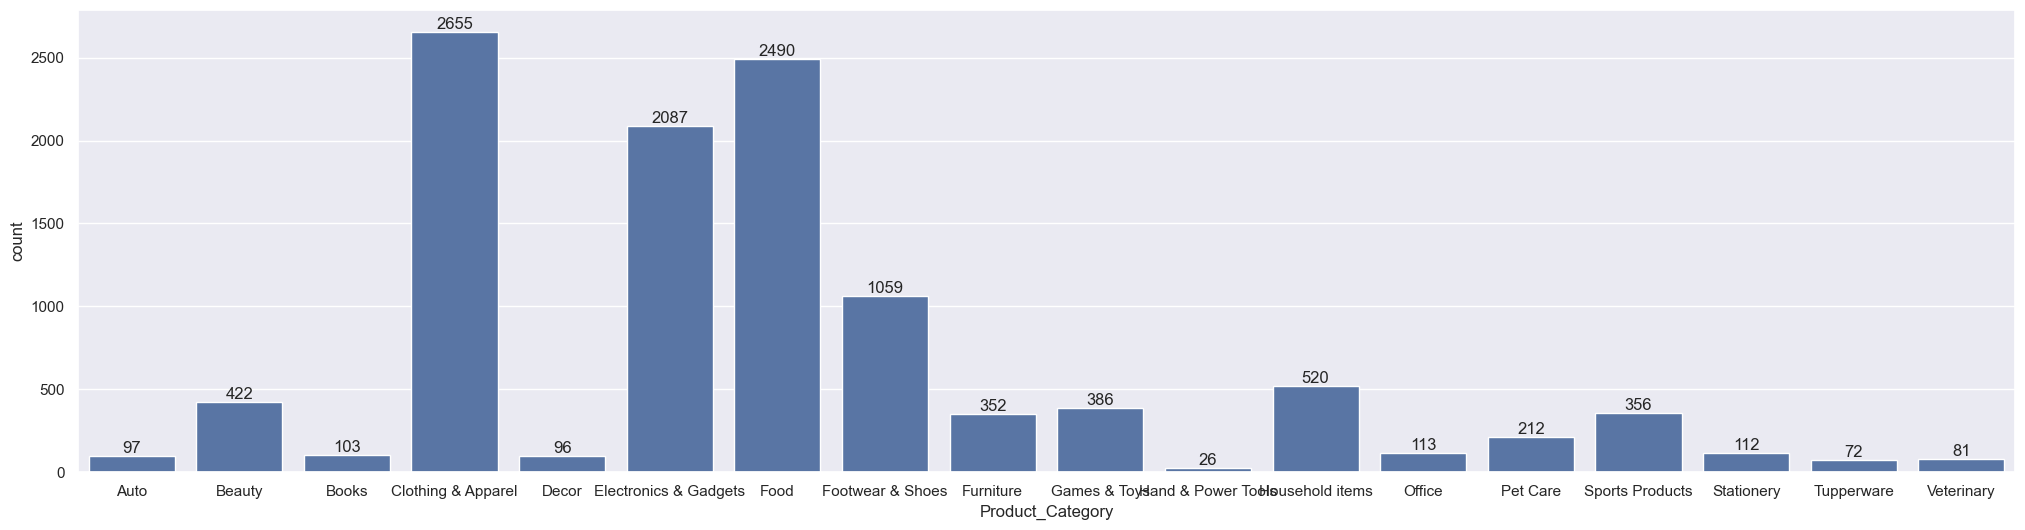

In [261]:
sns.set_theme(rc={'figure.figsize':(25,6)})
ax = sns.countplot(data = pc_df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Orders'>

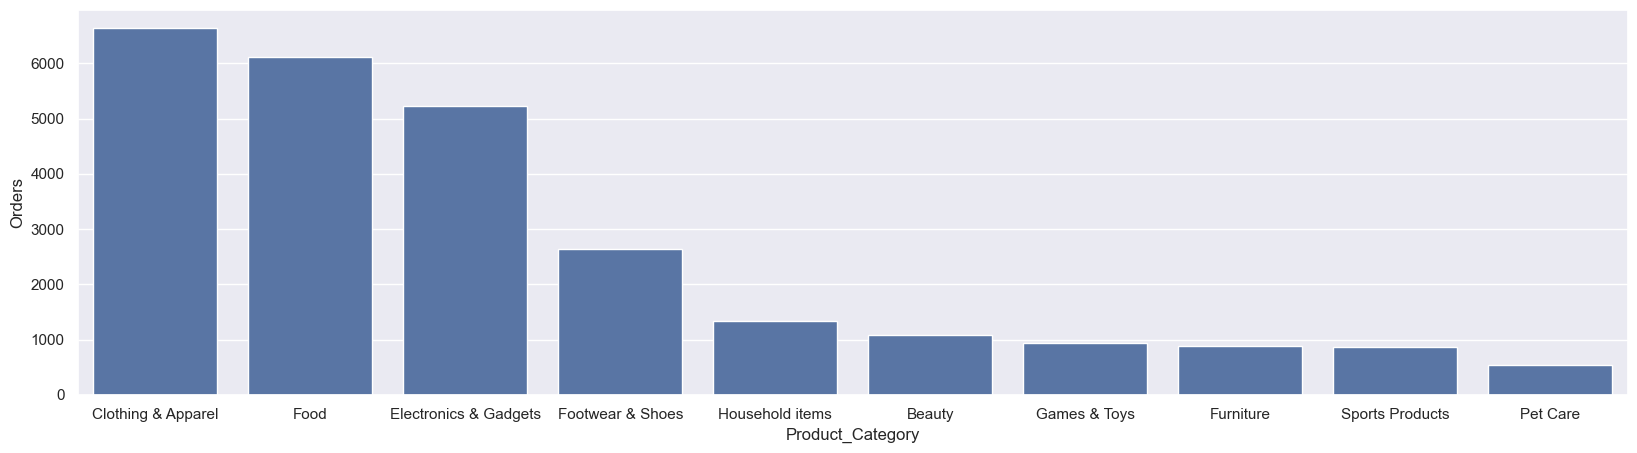

In [265]:
sales_state = pc_df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Orders')

<Axes: xlabel='Product_Category', ylabel='Amount'>

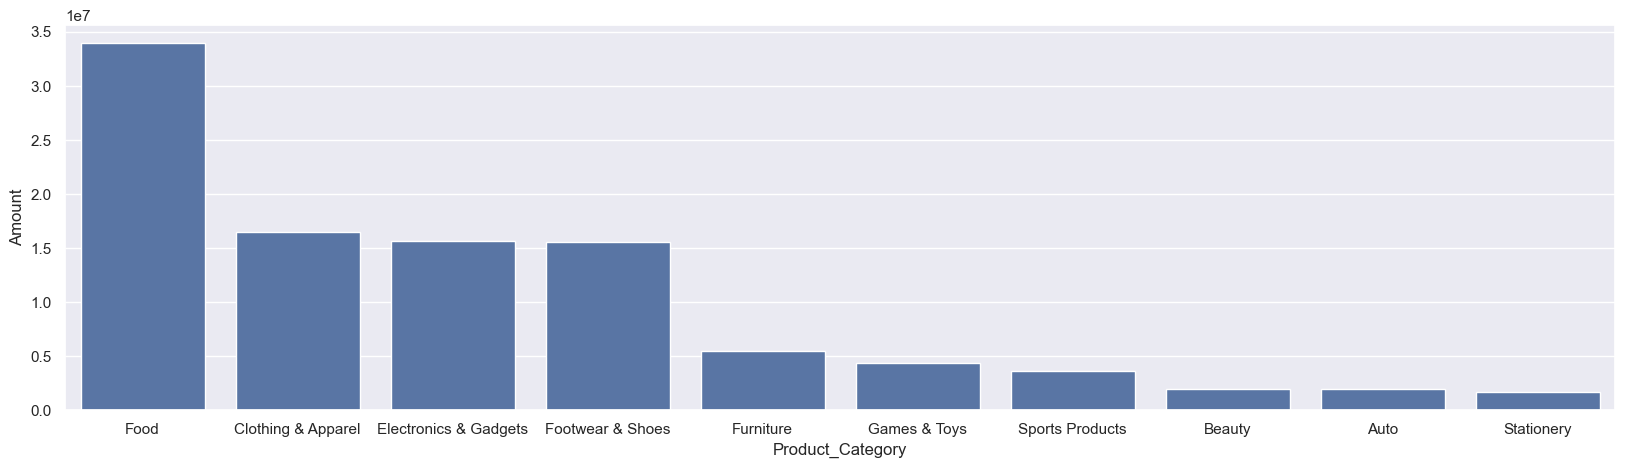

In [266]:
sales_state = pc_df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

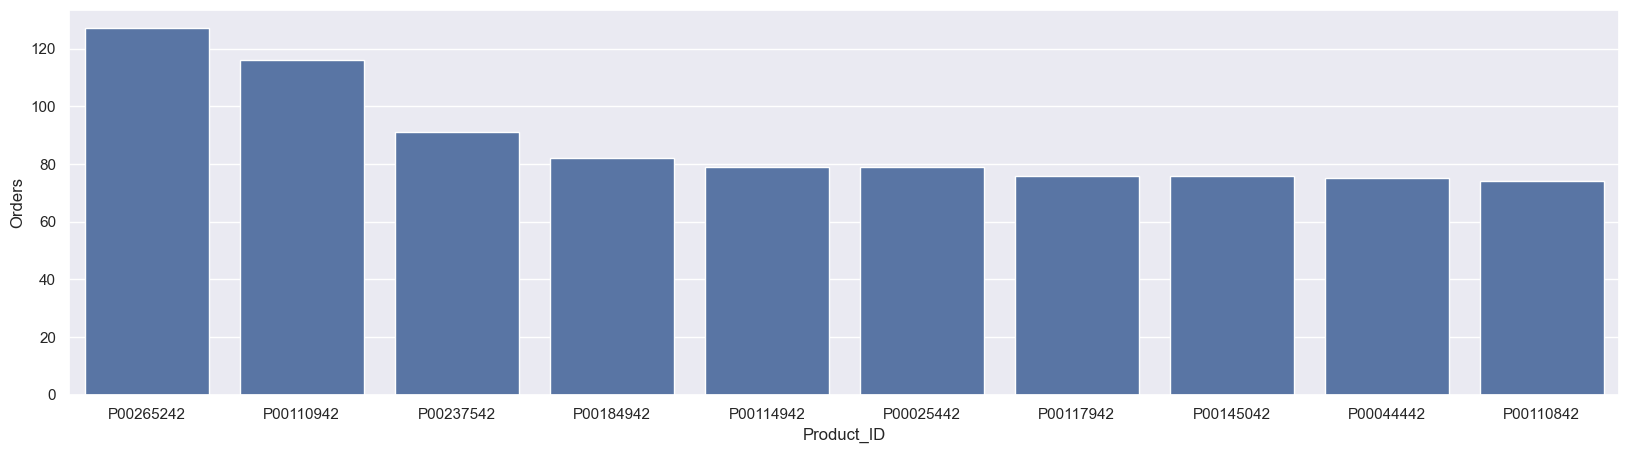

In [267]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

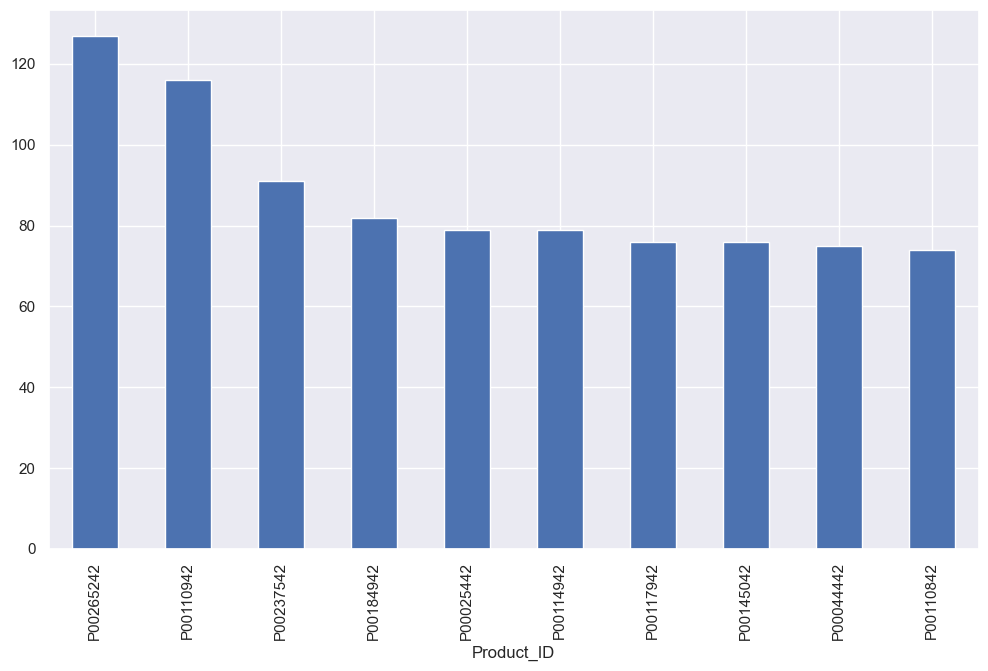

In [66]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion:

### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

Thank you!